***CASE STUDY***

In [100]:
#pip install -U tweepy

In [101]:
#pip install nltk

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import tweepy
from tweepy import OAuthHandler
import nltk
#nltk.download('punkt')
import shutup
shutup.please()

In [2]:
consumer_key="BN2XFmpBChfL64tBY0T8qsyD2"
consumer_secret="DKJiSMKTIzeJKoKhqwUvAWarEbOweaRY3TMgDWIfiVze3"
access_token="1442761396815634432-blCp8YR9o1oMbIUCrQmN1NiK"
access_token_secret="4raGJyaVELX9M76M7jDUuJrKupb2H9bqLu8DKPnv"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAMXlaQEAAAAAzunh4XvRTBoiDAkI%2F850TrKw%3DRFO46aKoEmVc7mqzipCezYWdhfdwXuiUb4JrEWzw1Q2mWi7cu4"

In [3]:
client = tweepy.Client(bearer_token = bearer_token)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
API = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
query_list=['digital electronics','robotics','artificial intelligence','computer vision','bioinformatics']  

In [5]:
%%time
tweets_response_list = []
for q in query_list:
    for page in tweepy.Cursor(API.search_tweets, q=q + " lang:en -filter:retweets", count=100, tweet_mode='extended').pages(50):
        for response in page:
            tweets_response_list.append([response.id_str, response.full_text, q])
    df = pd.DataFrame(tweets_response_list, columns = ['id_str', 'text', 'label'])
    df.to_csv("tweets_ramya_new.csv", index=False)
    
df.to_csv("tweets_ramya_new.csv", index=False)

CPU times: total: 12.7 s
Wall time: 2min 30s


In [6]:
df

,id_str,text,label
0,1521120082444926976,GAOMON M10K PRO 10 x 6.25 Inches Art Digital G...,digital electronics
1,1521116610764832768,man i hate digital electronics so damn muchhh ...,digital electronics
2,1521113104804941827,https://t.co/dRPEBmWJBr Riptunes Portable Cass...,digital electronics
3,1521113064099172352,12. ISMC semiconductor\n\n📊 Detailed Stats: ht...,digital electronics
4,1521105470873739264,@AtteroIndia @Navyavegi 5 Electronics:\n\nLAPT...,digital electronics
...,...,...,...
13187,1518164863461335040,Our Bioinformatics Masters (MSc/MRes) courses ...,bioinformatics
13188,1518133273096081408,#BioIT #BioInformatics What does it mean by pr...,bioinformatics
13189,1518133265726685185,#BioIT #BioInformatics Answer: Biostar under s...,bioinformatics
13190,1518127369546092544,Postdoctoral Funded Position in Microbial Ecol...,bioinformatics


***1. Creating Datasets***

In [5]:
data = pd.read_csv("tweets_ramya_new.csv")
data

,id_str,text,label
0,1521120082444926976,GAOMON M10K PRO 10 x 6.25 Inches Art Digital G...,digital electronics
1,1521116610764832768,man i hate digital electronics so damn muchhh ...,digital electronics
2,1521113104804941827,https://t.co/dRPEBmWJBr Riptunes Portable Cass...,digital electronics
3,1521113064099172352,12. ISMC semiconductor\n\n📊 Detailed Stats: ht...,digital electronics
4,1521105470873739264,@AtteroIndia @Navyavegi 5 Electronics:\n\nLAPT...,digital electronics
...,...,...,...
13187,1518164863461335040,Our Bioinformatics Masters (MSc/MRes) courses ...,bioinformatics
13188,1518133273096081408,#BioIT #BioInformatics What does it mean by pr...,bioinformatics
13189,1518133265726685185,#BioIT #BioInformatics Answer: Biostar under s...,bioinformatics
13190,1518127369546092544,Postdoctoral Funded Position in Microbial Ecol...,bioinformatics


# Exploratory Data Analysis 

<AxesSubplot:xlabel='label', ylabel='count'>

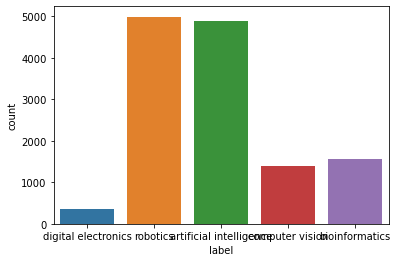

In [6]:
sns.countplot(x = data['label'])

#### Five top records of data

In [10]:
data.head()

,id_str,text,label
0,1521120082444926976,GAOMON M10K PRO 10 x 6.25 Inches Art Digital G...,digital electronics
1,1521116610764832768,man i hate digital electronics so damn muchhh ...,digital electronics
2,1521113104804941827,https://t.co/dRPEBmWJBr Riptunes Portable Cass...,digital electronics
3,1521113064099172352,12. ISMC semiconductor\n\n📊 Detailed Stats: ht...,digital electronics
4,1521105470873739264,@AtteroIndia @Navyavegi 5 Electronics:\n\nLAPT...,digital electronics


#### Columns/features in data

In [11]:
data.columns

Index(['id_str', 'text', 'label'], dtype='object')

#### Length of the dataset

In [12]:
print('length of data is', len(data))

length of data is 13192


#### Shape of data

In [13]:
data.shape

(13192, 3)

#### Data information

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13192 entries, 0 to 13191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_str  13192 non-null  int64 
 1   text    13192 non-null  object
 2   label   13192 non-null  object
dtypes: int64(1), object(2)
memory usage: 309.3+ KB


#### Datatypes of all columns

In [15]:
data.dtypes

id_str     int64
text      object
label     object
dtype: object

#### Checking for Null values

In [16]:
np.sum(data.isnull().any(axis=1))

0

#### Rows and columns in the dataset

In [17]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   13192


#### Let's label encode the class "My target is class so I need to convert them to numbers"

In [18]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

In [19]:
lb.fit(data['label'])

LabelEncoder()

In [20]:
classes= list(lb.classes_)

In [21]:
classes

['artificial intelligence',
 'bioinformatics',
 'computer vision',
 'digital electronics',
 'robotics']

In [22]:
data['class']= lb.fit_transform(data['label'])

In [23]:
data.head(10)

,id_str,text,label,class
0,1521120082444926976,GAOMON M10K PRO 10 x 6.25 Inches Art Digital G...,digital electronics,3
1,1521116610764832768,man i hate digital electronics so damn muchhh ...,digital electronics,3
2,1521113104804941827,https://t.co/dRPEBmWJBr Riptunes Portable Cass...,digital electronics,3
3,1521113064099172352,12. ISMC semiconductor\n\n📊 Detailed Stats: ht...,digital electronics,3
4,1521105470873739264,@AtteroIndia @Navyavegi 5 Electronics:\n\nLAPT...,digital electronics,3
5,1521101574268882945,i once had a nightmare in which i saw a dirty ...,digital electronics,3
6,1521098248181751809,2/8 \n👉🏻 Learn how to read and interpret scien...,digital electronics,3
7,1521097089505185792,GAOMON S620 6.5x4 Inch Anime Digital Graphic T...,digital electronics,3
8,1521091380356993026,"#ECommerce Market by Business Model, Browsing ...",digital electronics,3
9,1521086793067728896,Skylight Frame: 10 inch WiFi Digital Picture F...,digital electronics,3


In [24]:
data["class"].value_counts()

4    4993
0    4879
1    1563
2    1405
3     352
Name: class, dtype: int64

#### Check unique Target Values

In [25]:
data['class'].unique()

array([3, 4, 0, 2, 1])

#### Check the number of target values

In [26]:
data['class'].nunique()

5

# Data Visualization of Target Variables

<AxesSubplot:xlabel='class', ylabel='count'>

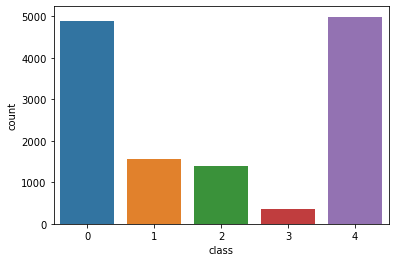

In [27]:
import seaborn as sns
sns.countplot(x='class', data=data)

# Data Preprocessing

#### Selecting the text and Target column for our further analysis

In [28]:
data=data[['text','class']]

#### Print unique values of target variables

In [29]:
data['class'].unique()             #i expect this to come as an array as given output above

array([3, 4, 0, 2, 1])

In [30]:
dataset = data

#### Making statement text in lower case

In [31]:
dataset.loc[:,'text']=dataset.loc[:,'text'].str.lower() ## i expect this as text printed instead of series
dataset['text'].tail()

13187    our bioinformatics masters (msc/mres) courses ...
13188    #bioit #bioinformatics what does it mean by pr...
13189    #bioit #bioinformatics answer: biostar under s...
13190    postdoctoral funded position in microbial ecol...
13191    when i read "bioinformatic analysis revealed" ...
Name: text, dtype: object

### Defining set containing all stopwords in English.

In [32]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)

{"mightn't", 'o', "wouldn't", 'before', 'i', 'you', 'yourself', 'hers', "that'll", "should've", 'those', 'yourselves', 'an', 'did', 'most', 'does', 'on', 'off', 'have', 'as', 'where', 'at', "aren't", 'couldn', 'didn', 'm', 'both', 'needn', 'if', 'so', 'than', 'won', 'she', 'because', 'or', 'they', 'after', "you've", 'same', 'about', 'them', 'can', 'her', 'his', 'here', 'himself', 'this', 'once', 'how', 's', 'their', "wasn't", "you'd", 'above', 'that', "don't", 'few', 'more', 'd', 'me', 'your', 'will', 'further', 'by', 'there', 'hasn', 'doing', 'myself', 'while', "haven't", 'when', 'the', 'it', "needn't", 'but', "you're", 'was', 'him', 'from', 'very', 'do', 'is', "isn't", 'why', 'for', 'wouldn', 'each', "weren't", 'just', 'ain', "hadn't", 'am', 'which', 'mightn', 'who', 'all', 'no', 'over', 'other', 'now', 'y', 'has', 'should', 'out', "couldn't", 'itself', 'we', "you'll", 'what', 'then', 'own', 'doesn', 'ma', 'between', "didn't", 'only', 'weren', 'ours', 'these', 'a', 'under', 'yours', 

#### Cleaning and removing the above stop words list from the tweet text

In [33]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    gaomon m10k pro 10 x 6.25 inches art digital g...
1    man hate digital electronics damn muchhh far h...
2    https://t.co/drpebmwjbr riptunes portable cass...
3    12. ismc semiconductor 📊 detailed stats: https...
4    @atteroindia @navyavegi 5 electronics: laptop ...
Name: text, dtype: object

#### Cleaning and removing URL’s

In [34]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

0    gaomon m10k pro 10 x 6.25 inches art digital g...
1    man hate digital electronics damn muchhh far h...
2     s portable cassette recorder player tape usb ...
3    12. ismc semiconductor 📊 detailed stats:  siys...
4    @atteroindia @navyavegi 5 electronics: laptop ...
Name: text, dtype: object

#### Cleaning and removing punctuations

In [35]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

13187    bioinformatics masters mscmres courses running...
13188    bioit bioinformatics mean pruning enrichment c...
13189    bioit bioinformatics answer biostar spam attac...
13190    postdoctoral funded position microbial ecology...
13191    read bioinformatic analysis revealed feel auth...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [36]:
def cleaning_numbers(data):
    data = re.sub('[0-9]+', '', data)
    data = re.sub('[^a-zA-Z-]', ' ', data)
    data = data.strip()
    data = re.sub('\s+', ' ', data)
    return data
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

0    gaomon mk pro x inches art digital graphic tab...
1    man hate digital electronics damn muchhh far h...
2    s portable cassette recorder player tape usb a...
3    ismc semiconductor detailed stats siysxhj news...
4    atteroindia navyavegi electronics laptop mobil...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [37]:
from nltk.tokenize import word_tokenize
dataset['text'] = dataset['text'].apply(word_tokenize)
dataset['text'].head()

0    [gaomon, mk, pro, x, inches, art, digital, gra...
1    [man, hate, digital, electronics, damn, muchhh...
2    [s, portable, cassette, recorder, player, tape...
3    [ismc, semiconductor, detailed, stats, siysxhj...
4    [atteroindia, navyavegi, electronics, laptop, ...
Name: text, dtype: object

#### Applying Stemming

In [38]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return " ".join(text)
dataset['text_stem']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text_stem'].head()

0    gaomon mk pro x inch art digit graphic tablet ...
1    man hate digit electron damn muchhh far hardes...
2    s portabl cassett record player tape usb audio...
3    ismc semiconductor detail stat siysxhj news re...
4    atteroindia navyavegi electron laptop mobil bl...
Name: text_stem, dtype: object

#### Applying Lemmatizer

In [39]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return " ".join(text)
dataset['text_lemma'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text_lemma'].head()

0    gaomon mk pro x inch art digital graphic table...
1    man hate digital electronics damn muchhh far h...
2    s portable cassette recorder player tape usb a...
3    ismc semiconductor detailed stats siysxhj news...
4    atteroindia navyavegi electronics laptop mobil...
Name: text_lemma, dtype: object

#### Separating input feature and label

In [40]:
X=dataset['text_stem']
y=dataset['class']

In [41]:
X

0        gaomon mk pro x inch art digit graphic tablet ...
1        man hate digit electron damn muchhh far hardes...
2        s portabl cassett record player tape usb audio...
3        ismc semiconductor detail stat siysxhj news re...
4        atteroindia navyavegi electron laptop mobil bl...
                               ...                        
13187    bioinformat master mscmre cours run year come ...
13188    bioit bioinformat mean prune enrich case rosen...
13189    bioit bioinformat answer biostar spam attack r...
13190    postdoctor fund posit microbi ecolog bioinform...
13191    read bioinformat analysi reveal feel author wr...
Name: text_stem, Length: 13192, dtype: object

In [42]:
y

0        3
1        3
2        3
3        3
4        3
        ..
13187    1
13188    1
13189    1
13190    1
13191    1
Name: class, Length: 13192, dtype: int32

In [43]:
data_wc = data['text']
data_wc = [" ".join(t) for t in data_wc]
data_wc[:2]

['gaomon mk pro x inches art digital graphic tablet drawing android os support shop se couponcode smart discount checkout gadgets electronics',
 'man hate digital electronics damn muchhh far hardest subject ever even branch like might even get back point theres enormous syllabus cant even begin lottt']

#### Plot a cloud of words for negative tweets

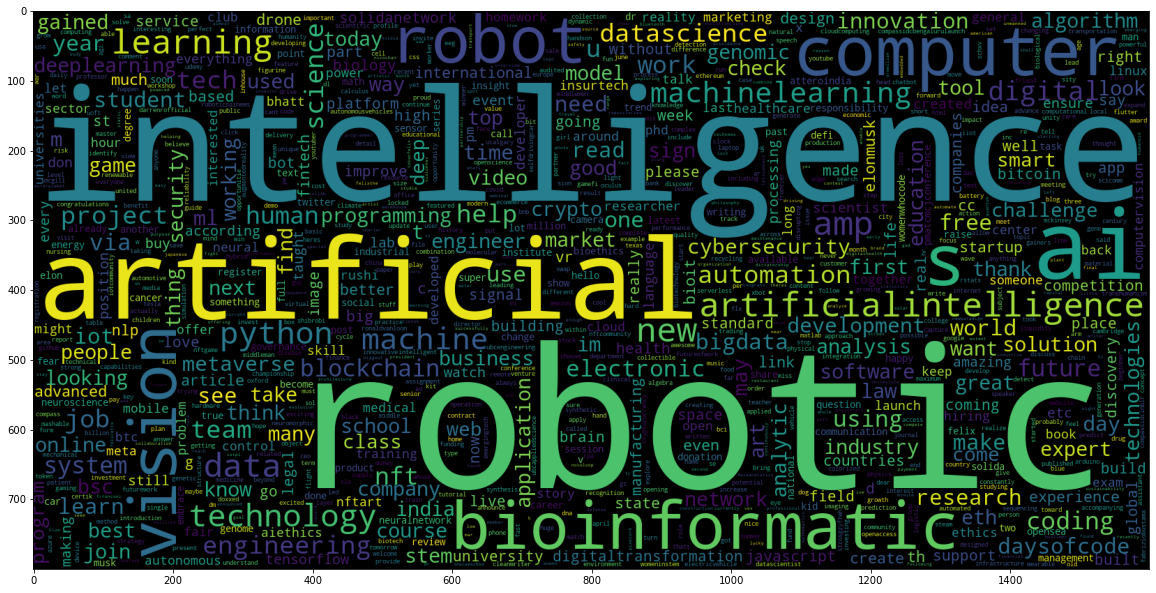

In [44]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_wc))
plt.imshow(wc)

# Splitting our data into Train and Test Subset

In [45]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 26105111)


In [46]:
X_train.shape, X_test.shape

((9234,), (3958,))

In [47]:
y_train.shape, y_test.shape

((9234,), (3958,))

In [48]:
X_train

8334     artifici intellig classroom rachel dene poth p...
9491              govern announc am artifici intellig push
9777     rzenelzld giveawayhost project creat maximum r...
11021    nga s mark munsel deputi director data digit i...
4609     narvuntien mustbejosh hakimi hakimi wayneallan...
                               ...                        
5131     dji halt russia ukrain busi prevent drone misu...
8013     ebmhead ricfulop lorakolodni stevelevin know r...
8788     legitgraci unigridorg solida project project b...
9947     feder bank agenc tri ensur ai ml benefit rathe...
3827     appreci elonmusk inspir innov climat vision in...
Name: text_stem, Length: 9234, dtype: object

# Transforming Dataset using TF-IDF Vectorizer

#### Fit the TF-IDF Vectorizer

In [49]:
%%time
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  109923
Wall time: 821 ms


#### Transform the data using TF-IDF Vectorizer

In [50]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [51]:
labels = classes
labels

['artificial intelligence',
 'bioinformatics',
 'computer vision',
 'digital electronics',
 'robotics']

#### After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

##### Accuracy Score
##### Confusion Matrix with Plot

In [52]:
# Predict values for Test dataset
def print_confusion_matrix(model, y_pred, labels):
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = labels
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=True, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    Train_Accuracy = model.score(X_train, y_train)
    Test_Accuracy = model.score(X_test, y_test)
    print("Train Accuracy = ", Train_Accuracy)
    print("Test Accuracy = ", Test_Accuracy)
    return Train_Accuracy, Test_Accuracy

### Model Building

####  the problem statement we have used three different models respectively :

#### Bernoulli Naive Bayes
#### SVM (Support Vector Machine)
#### Logistic Regression
#### The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models and then try to find out the one which gives the best performance among them.

### Model-1

              precision    recall  f1-score   support

           0       0.67      0.97      0.79      1464
           1       1.00      0.07      0.13       469
           2       0.89      0.06      0.11       421
           3       0.00      0.00      0.00       106
           4       0.80      0.95      0.87      1498

    accuracy                           0.73      3958
   macro avg       0.67      0.41      0.38      3958
weighted avg       0.76      0.73      0.65      3958

Train Accuracy =  0.798029023175222
Test Accuracy =  0.7329459322890348


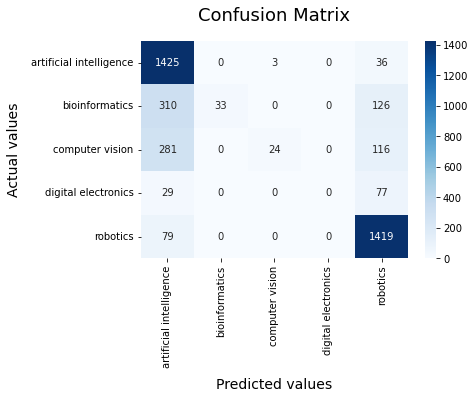

In [53]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)
Train_Accuracy_bnb1, Test_Accuracy_bnb1 = print_confusion_matrix(BNBmodel, y_pred1, labels)

#### Model-2:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1464
           1       1.00      0.96      0.98       469
           2       0.96      0.96      0.96       421
           3       0.92      0.94      0.93       106
           4       0.95      0.96      0.96      1498

    accuracy                           0.96      3958
   macro avg       0.96      0.96      0.96      3958
weighted avg       0.96      0.96      0.96      3958

Train Accuracy =  0.9922027290448343
Test Accuracy =  0.9608388074785245


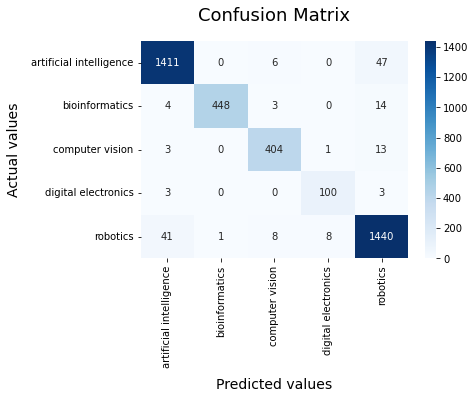

In [54]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred2 = SVCmodel.predict(X_test)
Train_Accuracy_svc1, Test_Accuracy_svc1 = print_confusion_matrix(SVCmodel, y_pred2, labels)

#### Model-3

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1464
           1       1.00      0.93      0.96       469
           2       0.96      0.94      0.95       421
           3       0.95      0.89      0.92       106
           4       0.94      0.97      0.95      1498

    accuracy                           0.96      3958
   macro avg       0.96      0.94      0.95      3958
weighted avg       0.96      0.96      0.96      3958

Train Accuracy =  0.9889538661468485
Test Accuracy =  0.9560384032339565


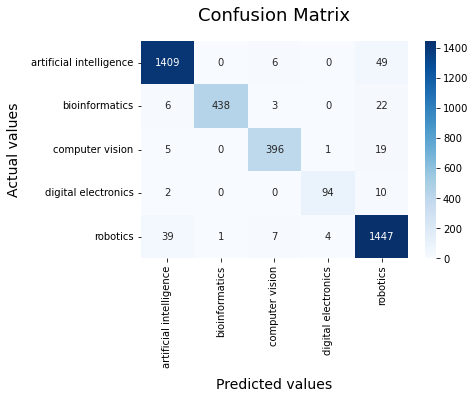

In [55]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred3 = LRmodel.predict(X_test)
Train_Accuracy_lr1, Test_Accuracy_lr1 = print_confusion_matrix(LRmodel, y_pred3, labels)

In [56]:
class Word2VecVectorizer:
    def __init__(self, file_path):
        print("Loading in word vectors...")
        binary_file = file_path.endswith(".bin")
        self.word_vectors = KeyedVectors.load_word2vec_format(
            file_path, encoding="utf-8",
            binary=binary_file
        )
        print("Finished loading in word vectors")

    def fit(self, data):
        pass

    def transform(self, data):
        # determine the dimensionality of vectors
        v = self.word_vectors.get_vector('king')
        self.D = v.shape[0]

        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        for sentence in data:
            tokens = sentence.split()
            vecs = []
            m = 0
            for word in tokens:
                try:
                    # throws KeyError if word not found
                    vec = self.word_vectors.get_vector(word)
                    vecs.append(vec)
                    m += 1
                except KeyError:
                    pass
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
        print("Number of samples with no words found: %s / %s" % (emptycount, len(data)))
        return X


    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [57]:
# Separating the 95% data for training data and 5% for testing data
X=dataset['text_lemma']
y=dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 26105111)

In [63]:
%%time
fpath1 = r"C:\Users\Web Developer\Desktop\AA.SC.P2MCA2107434_Ramya casestudyNLP\wiki-news-300d-1M.vec\wiki-news-300d-1M.vec"
w2v_model = Word2VecVectorizer(fpath1)

Loading in word vectors...
Finished loading in word vectors
Wall time: 3min 47s


In [64]:
X_train = w2v_model.fit_transform(X_train)
X_test = w2v_model.transform(X_test)

Number of samples with no words found: 3 / 9234
Number of samples with no words found: 3 / 3958


In [65]:
X_train.shape, X_test.shape

((9234, 300), (3958, 300))

In [66]:
y_train.shape, y_test.shape

((9234,), (3958,))

Model-4

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      1464
           1       0.93      0.93      0.93       469
           2       0.72      0.91      0.81       421
           3       0.72      0.92      0.81       106
           4       0.90      0.91      0.91      1498

    accuracy                           0.90      3958
   macro avg       0.85      0.91      0.87      3958
weighted avg       0.91      0.90      0.90      3958

Train Accuracy =  0.902425817630496
Test Accuracy =  0.8969176351692774


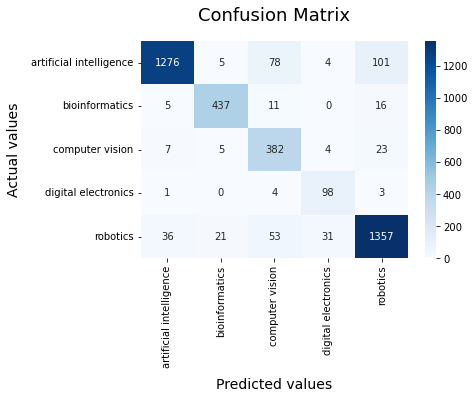

In [67]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred4 = BNBmodel.predict(X_test)
Train_Accuracy_bnb2, Test_Accuracy_bnb2 = print_confusion_matrix(BNBmodel, y_pred4, labels)

Model-5

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1464
           1       0.96      0.96      0.96       469
           2       0.93      0.91      0.92       421
           3       0.91      0.88      0.89       106
           4       0.95      0.95      0.95      1498

    accuracy                           0.95      3958
   macro avg       0.94      0.93      0.94      3958
weighted avg       0.95      0.95      0.95      3958

Train Accuracy =  0.9570067143166558
Test Accuracy =  0.9489641232945932


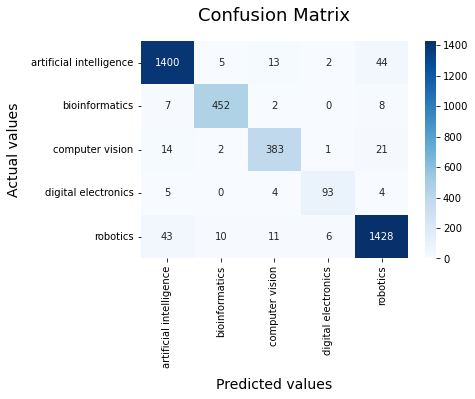

In [68]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred5 = SVCmodel.predict(X_test)
Train_Accuracy_svc2, Test_Accuracy_svc2 = print_confusion_matrix(SVCmodel, y_pred5, labels)

Model-6

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1464
           1       0.98      0.94      0.96       469
           2       0.93      0.89      0.91       421
           3       0.94      0.84      0.89       106
           4       0.93      0.96      0.95      1498

    accuracy                           0.94      3958
   macro avg       0.95      0.92      0.93      3958
weighted avg       0.94      0.94      0.94      3958

Train Accuracy =  0.9509421702404158
Test Accuracy =  0.9444163719050025


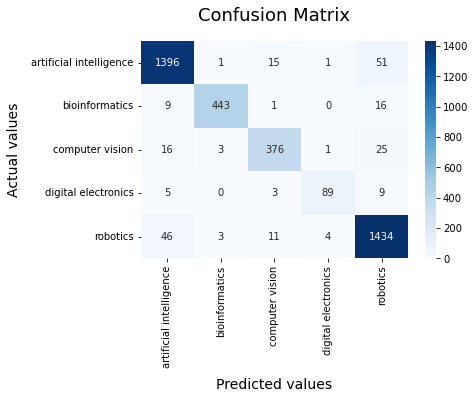

In [69]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred6 = LRmodel.predict(X_test)
Train_Accuracy_lr2, Test_Accuracy_lr2 = print_confusion_matrix(LRmodel, y_pred6, labels)

In [73]:
%%time
fpath2 = "GoogleNewsvectorsnegative300.bin"
w2v_model2 = Word2VecVectorizer(fpath2)

Loading in word vectors...
Finished loading in word vectors
Wall time: 52.6 s


In [74]:
# Separating the 95% data for training data and 5% for testing data
X=dataset['text_lemma']
y=dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 26105111)

In [75]:
X_train = w2v_model2.fit_transform(X_train)
X_test = w2v_model2.transform(X_test)

Number of samples with no words found: 3 / 9234
Number of samples with no words found: 3 / 3958


In [76]:
X_train.shape, X_test.shape

((9234, 300), (3958, 300))

In [77]:
y_train.shape, y_test.shape

((9234,), (3958,))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1464
           1       0.92      0.87      0.89       469
           2       0.72      0.88      0.79       421
           3       0.61      0.89      0.72       106
           4       0.91      0.90      0.90      1498

    accuracy                           0.88      3958
   macro avg       0.82      0.88      0.84      3958
weighted avg       0.89      0.88      0.89      3958

Train Accuracy =  0.8863980940004332
Test Accuracy =  0.8845376452753916


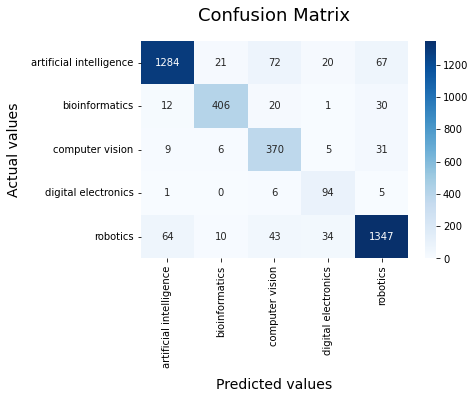

In [78]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred7 = BNBmodel.predict(X_test)
Train_Accuracy_bnb3, Test_Accuracy_bnb3 = print_confusion_matrix(BNBmodel, y_pred7, labels)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1464
           1       0.97      0.95      0.96       469
           2       0.90      0.91      0.91       421
           3       0.91      0.88      0.89       106
           4       0.94      0.95      0.95      1498

    accuracy                           0.95      3958
   macro avg       0.94      0.93      0.93      3958
weighted avg       0.95      0.95      0.95      3958

Train Accuracy =  0.9594975092051116
Test Accuracy =  0.9451743304699343


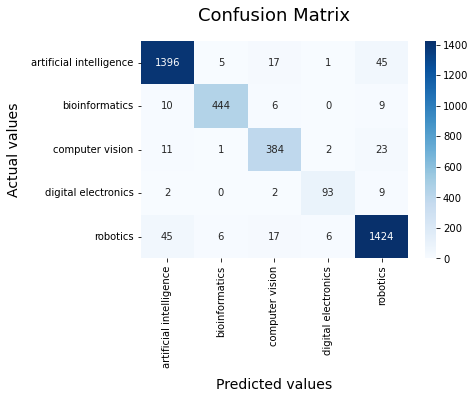

In [79]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred8 = SVCmodel.predict(X_test)
Train_Accuracy_svc3, Test_Accuracy_svc3 = print_confusion_matrix(SVCmodel, y_pred8, labels)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1464
           1       0.98      0.94      0.96       469
           2       0.91      0.90      0.90       421
           3       0.93      0.85      0.89       106
           4       0.93      0.95      0.94      1498

    accuracy                           0.94      3958
   macro avg       0.94      0.92      0.93      3958
weighted avg       0.94      0.94      0.94      3958

Train Accuracy =  0.9544076239982673
Test Accuracy =  0.943911066195048


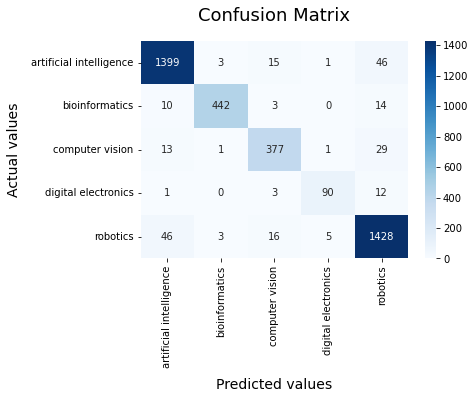

In [80]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred8 = LRmodel.predict(X_test)
Train_Accuracy_lr3, Test_Accuracy_lr3 = print_confusion_matrix(LRmodel, y_pred8, labels)

In [81]:
list_accuracy = [[Test_Accuracy_bnb1, Test_Accuracy_svc1, Test_Accuracy_lr1], 
                 [Test_Accuracy_bnb2, Test_Accuracy_svc2, Test_Accuracy_lr2], 
                 [Test_Accuracy_bnb3, Test_Accuracy_svc3, Test_Accuracy_lr3]]
df_accuracy = pd.DataFrame(list_accuracy, columns = ['BernoulliNB', 'LinearSVC', 'LogisticRegression'])
df_accuracy.index = ['TF-IDF', 'Word Embedding 1', 'Word Embedding 2']
df_accuracy[df_accuracy.columns] = df_accuracy[df_accuracy.columns].applymap(lambda x: x*100)
df_accuracy[df_accuracy.columns] = df_accuracy[df_accuracy.columns].applymap("{0:.2f}%".format)
df_accuracy

,BernoulliNB,LinearSVC,LogisticRegression
TF-IDF,73.29%,96.08%,95.60%
Word Embedding 1,89.69%,94.90%,94.44%
Word Embedding 2,88.45%,94.52%,94.39%
